# Presentación del Proyecto


---

## Abstracto con Motivación y Audiencia

---

<br>

### Motivación:
El parque automotor argentino evoluciona constantemente. Conocer mejor los patrones de inscripción y los perfiles de los titulares puede permitir a entidades estatales, aseguradoras, concesionarias o fabricantes optimizar sus políticas comerciales, de seguros o fiscales.

<br>

### Audiencia de Áreas como:

* Gobierno (registro automotor, estadísticas, seguridad vial)

* Marketing y ventas de automotrices

* Aseguradoras

* Analistas de datos e ingenieros de machine learning

<br>

---

## Contexto Comercial y Analitico


---

<br>

### Comercial:
Las decisiones estratégicas en cuanto a segmentación de mercado, diseño de productos financieros o campañas de marketing se pueden mejorar si entendemos:

* Qué tipo de personas inscriben qué tipo de vehículos

* Dónde se concentran los modelos nuevos o antiguos

<br>

### Analítico:
El dataset contiene múltiples variables que pueden permitir predicciones o segmentaciones valiosas:

* Tipo de trámite

* Año de nacimiento y género del titular

* Tipo, año y marca del vehículo

* Provincia del registro o del titular

<br>

---

## Preguntas / Hipótesis a Resolver Mediante el Análisis de Datos

---

<br>

### Preguntas:

* Pregunta 1: ¿En qué provincia se realizaron mayor cantidad de inscripciones en febrero de 2025?

* Pregunta 2: ¿Cuál es la marca más registrada por provincia?

* Pregunta 3: ¿Qué características tienen en común los titulares de autos nuevos?

* Pregunta 4: ¿Qué tipo de persona (género, edad, origen) realiza más trámites?

<br>

### Hipótesis:

* Hipótesis Pregunta 1:
La provincia de Buenos Aires concentró la mayor cantidad de inscripciones en febrero de 2025 debido a su densidad poblacional.

* Hipótesis Pregunta 2:
La marca Toyota lidera los registros en provincias del norte y centro del país, mientras que Volkswagen predomina en las provincias del sur, debido a la preferencia regional y disponibilidad de concesionarios.

* Hipótesis Pregunta 3:
Los titulares de autos nuevos suelen ser personas jóvenes (menores de 40 años), residentes en zonas urbanas y con un porcentaje de titularidad del 100%.

* Hipótesis Pregunta 4:
Los trámites automotores son realizados mayoritariamente por varones de entre 35 y 55 años, nacidos en Argentina y residentes en provincias con alta densidad poblacional.

<br>

---

## Objetivo:

---

<br>

El objetivo de este proyecto es analizar los registros de automotores en Argentina durante el año 2025 para identificar patrones de comportamiento vinculados a las inscripciones, marcas más populares y características de los titulares de vehículos.

<br>

Para ello, se responderán preguntas clave como:

<br>

* ¿En qué provincia se realizaron más inscripciones en febrero de 2025?

* ¿Cuál es la marca más registrada por provincia?

* ¿Qué características tienen en común los titulares de autos nuevos?

* ¿Qué tipo de persona (género, edad, origen) realiza más trámites?

<br>

A partir de estos análisis exploratorios, se desarrollará un modelo de machine learning supervisado de clasificación, con el objetivo de predecir si un vehículo registrado es nuevo o usado, en función de variables como:

<br>

* Año del modelo del automotor

* Tipo, uso y marca del vehículo

* Género, edad, provincia y país de nacimiento del titular

<br>

Este enfoque permite no solo responder preguntas descriptivas del negocio, sino también construir una herramienta predictiva útil para:

<br>

* Identificar perfiles de potenciales compradores de autos nuevos

* Diseñar campañas de marketing segmentadas

* Tomar decisiones basadas en datos en sectores públicos y privados del rubro automotor

<br>

Se utilizarán algoritmos como Random Forest y Regresión Logística, priorizando precisión y facilidad de interpretación.

<br>

# Presentación Ejecutiva (P.F)

## Link de la Presentación Ejecutiva o Documentación (Storytelling "PowerPoint o PDF")

# Lectura de Datos

## Librerías Necesarias para el Análisis de Datos (explicacion de cada una de las partes del proyecto) (P.F)

## Configuración del Entorno de Python en Google Colab

In [ ]:
# Manipulación de datos

import json
import os
import pandas as pd
import numpy as np

# Visualización

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modelado

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignorar warnings para evitar molestias

import warnings
warnings.filterwarnings('ignore')

# Configuraciones gráficas

plt.style.use('ggplot')
sns.set_palette("pastel")

# Visualización de dataframes completa

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)

## Lectura del Dataset

In [10]:
# Busco el archivo en mi pc

from google.colab import files

uploaded = files.upload()

# Me conecto al dataset

df = pd.read_excel('Dnrpa_Dataset.xlsx', engine='openpyxl')

Saving Dnrpa_Dataset.xlsx to Dnrpa_Dataset (1).xlsx


## Análisis Inicial del Dataset

In [11]:
# 1. Dimensiones del dataset (filas, columnas)

print(f"Dimensiones del dataset: {df.shape}\n")

# 2. Primeras filas para entender estructura y datos

print("Primeras 5 filas:")
display(df.head())

# 3. Tipos de datos por columna

print("Tipos de datos:")
print(df.dtypes)

# 4. Información general: valores no nulos y memoria usada

print("\nInformación general del DataFrame:")
print(df.info())

# 5. Estadísticas descriptivas para columnas numéricas

print("\nEstadísticas descriptivas de columnas numéricas:")
display(df.describe())

# 6. Estadísticas para variables categóricas

print("\nEstadísticas para variables categóricas:")
display(df.describe(include=['object']))

# 7. Recuento de valores nulos por columna

print("\nValores nulos por columna:")
print(df.isnull().sum())

# 8. Recuento de valores únicos por columna

print("\nCantidad de valores únicos por columna:")
print(df.nunique())

Dimensiones del dataset: (44691, 25)

Primeras 5 filas:


,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,INSCRIPCION INICIAL NACIONAL,2025-02-02,2025-02-02,1280,ESCOBAR Nº 3 (EX. INGENIERO MASCHWITZ),Buenos Aires,Nacional,2025,38,TRAILER (CAT.O1),JB,MB TRAILERS,9,NAUTICO N,1.0,Privado,Física,INGENIERO MASCHWITZ,BUENOS AIRES,Masculino,1970,ARGENTINA,100.0,6,200.0
1,INSCRIPCION INICIAL NACIONAL,2025-02-02,2025-02-02,1280,ESCOBAR Nº 3 (EX. INGENIERO MASCHWITZ),Buenos Aires,Nacional,2025,20,PICK-UP,68,TOYOTA,BR,HILUX 4X2 DC SR 2.4 TDI 6 MT,1.0,Privado,Física,GARÍN,BUENOS AIRES,Masculino,1969,ARGENTINA,50.0,6,200.0
2,INSCRIPCION INICIAL NACIONAL,2025-02-03,2025-02-03,4055,CORDOBA Nº 14,Córdoba,Nacional,2025,17,SEDAN 5 PUERTAS,34,PEUGEOT,UP,208 ALLURE MT AM25.5,1.0,Privado,Física,CORDOBA,CORDOBA,Femenino,1999,ARGENTINA,100.0,14,200.0
3,INSCRIPCION INICIAL NACIONAL,2025-02-03,2025-02-03,4055,CORDOBA Nº 14,Córdoba,Nacional,2025,20,PICK-UP,53,VOLKSWAGEN,9Z,AMAROK EXTREME V6 AT 4X4 G2,1.0,Privado,Física,CORDOBA,CORDOBA,Masculino,1974,ARGENTINA,100.0,14,200.0
4,INSCRIPCION INICIAL IMPORTADO,2025-02-03,2025-02-03,4055,CORDOBA Nº 14,Córdoba,Protocolo 21,2025,4,RURAL 5 PUERTAS,151,JEEP,136,RENEGADE SPORT 1.8L AT6 FWD,1.0,Privado,Física,CORDOBA,CORDOBA,Femenino,1992,ARGENTINA,100.0,14,200.0


Tipos de datos:
tramite_tipo                              object
tramite_fecha                     datetime64[ns]
fecha_inscripcion_inicial         datetime64[ns]
registro_seccional_codigo                  int64
registro_seccional_descripcion            object
registro_seccional_provincia              object
automotor_origen                          object
automotor_anio_modelo                      int64
automotor_tipo_codigo                     object
automotor_tipo_descripcion                object
automotor_marca_codigo                    object
automotor_marca_descripcion               object
automotor_modelo_codigo                   object
automotor_modelo_descripcion              object
automotor_uso_codigo                     float64
automotor_uso_descripcion                 object
titular_tipo_persona                      object
titular_domicilio_localidad               object
titular_domicilio_provincia               object
titular_genero                            object
titu

,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,automotor_anio_modelo,automotor_uso_codigo,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
count,44691,44691,44691.000000,44691.000000,44688.000000,44691.000000,44691.000000,36021.000000
mean,2025-02-18 08:31:59.742229504,2025-02-18 08:31:59.742229504,7629.635005,2024.927950,0.994227,96.639659,28.685104,200.830793
min,2025-02-02 00:00:00,2025-02-02 00:00:00,1001.000000,1928.000000,0.000000,17.000000,2.000000,118.000000
25%,2025-02-12 00:00:00,2025-02-12 00:00:00,1286.000000,2025.000000,1.000000,100.000000,6.000000,200.000000
50%,2025-02-20 00:00:00,2025-02-20 00:00:00,4028.000000,2025.000000,1.000000,100.000000,14.000000,200.000000
75%,2025-02-26 00:00:00,2025-02-26 00:00:00,14007.000000,2025.000000,1.000000,100.000000,54.000000,200.000000
max,2025-02-28 00:00:00,2025-02-28 00:00:00,24008.000000,2025.000000,9.000000,100.000000,94.000000,501.000000
std,NaN,NaN,7652.459265,1.020554,0.149929,12.533790,30.422458,9.786669



Estadísticas para variables categóricas:


,tramite_tipo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_tipo_codigo,automotor_tipo_descripcion,automotor_marca_codigo,automotor_marca_descripcion,automotor_modelo_codigo,automotor_modelo_descripcion,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento
count,44691,44691,44691,44691,44680,44691,44681,44691,44681,44691,44686,44691,44677,44691,44691,44691,44691
unique,7,838,24,3,46,50,158,150,798,1304,4,2,3383,24,4,111,38
top,INSCRIPCION INICIAL IMPORTADO,CAPITAL FEDERAL Nº 043,Buenos Aires,Nacional,5,SEDAN 5 PUERTAS,34,VOLKSWAGEN,CP,CRONOS DRIVE 1.3 GSE BZ,Privado,Física,C.AUTONOMA DE BS.AS,BUENOS AIRES,Masculino,1978,ARGENTINA
freq,22872,276,12759,21809,7775,11704,4319,7672,1512,1364,43743,36027,8186,12759,22716,1110,35065



Valores nulos por columna:
tramite_tipo                         0
tramite_fecha                        0
fecha_inscripcion_inicial            0
registro_seccional_codigo            0
registro_seccional_descripcion       0
registro_seccional_provincia         0
automotor_origen                     0
automotor_anio_modelo                0
automotor_tipo_codigo               11
automotor_tipo_descripcion           0
automotor_marca_codigo              10
automotor_marca_descripcion          0
automotor_modelo_codigo             10
automotor_modelo_descripcion         0
automotor_uso_codigo                 3
automotor_uso_descripcion            5
titular_tipo_persona                 0
titular_domicilio_localidad         14
titular_domicilio_provincia          0
titular_genero                       0
titular_anio_nacimiento              0
titular_pais_nacimiento              0
titular_porcentaje_titularidad       0
titular_domicilio_provincia_id       0
titular_pais_nacimiento_id        86

## Descripción de Variables

| **Columna**                      | **Descripción**                                                     |
| -------------------------------- | ------------------------------------------------------------------- |
| `tramite_tipo`                   | Tipo de trámite realizado (ej. alta, transferencia, baja, etc.).    |
| `tramite_fecha`                  | Fecha en que se realizó el trámite.                                 |
| `fecha_inscripcion_inicial`      | Fecha en que el automotor fue inscripto por primera vez.            |
| `registro_seccional_codigo`      | Código numérico del registro seccional donde se realizó el trámite. |
| `registro_seccional_descripcion` | Nombre del registro seccional.                                      |
| `registro_seccional_provincia`   | Provincia del registro seccional.                                   |
| `automotor_origen`               | Origen del automotor (nacional o importado).                        |
| `automotor_anio_modelo`          | Año del modelo del automotor.                                       |
| `automotor_tipo_codigo`          | Código del tipo de automotor (auto, moto, camión, etc.).            |
| `automotor_tipo_descripcion`     | Descripción del tipo de automotor.                                  |
| `automotor_marca_codigo`         | Código de la marca del automotor.                                   |
| `automotor_marca_descripcion`    | Nombre de la marca (ej. Ford, Chevrolet, Toyota, etc.).             |
| `automotor_modelo_codigo`        | Código del modelo específico del automotor.                         |
| `automotor_modelo_descripcion`   | Nombre del modelo del automotor.                                    |
| `automotor_uso_codigo`           | Código del tipo de uso (particular, comercial, oficial, etc.).      |
| `automotor_uso_descripcion`      | Descripción del uso del vehículo.                                   |
| `titular_tipo_persona`           | Si el titular es persona física o jurídica.                         |
| `titular_domicilio_localidad`    | Localidad del domicilio del titular.                                |
| `titular_domicilio_provincia`    | Provincia del domicilio del titular.                                |
| `titular_genero`                 | Género del titular (masculino, femenino, otro).                     |
| `titular_anio_nacimiento`        | Año de nacimiento del titular.                                      |
| `titular_pais_nacimiento`        | País de nacimiento del titular.                                     |
| `titular_porcentaje_titularidad` | Porcentaje de participación del titular sobre el vehículo.          |
| `titular_domicilio_provincia_id` | ID numérico de la provincia del domicilio del titular.              |
| `titular_pais_nacimiento_id`     | ID numérico del país de nacimiento del titular.                     |


### Columnas a Utilizar para el Analisis

| **Columna**                      | **Descripción**                                                     |
| -------------------------------- | ------------------------------------------------------------------- |
| `tramite_tipo`                   | Tipo de trámite realizado (ej. alta, transferencia, baja, etc.).    |
| `tramite_fecha`                  | Fecha en que se realizó el trámite.                                 |
| `fecha_inscripcion_inicial`      | Fecha en que el automotor fue inscripto por primera vez.            |
| `registro_seccional_codigo`      | Código numérico del registro seccional donde se realizó el trámite. |
| `registro_seccional_descripcion` | Nombre del registro seccional.                                      |
| `registro_seccional_provincia`   | Provincia del registro seccional.                                   |
| `automotor_origen`               | Origen del automotor (nacional o importado).                        |
| `automotor_anio_modelo`          | Año del modelo del automotor.                                       |
| `automotor_tipo_descripcion`     | Descripción del tipo de automotor.                                  |
| `automotor_marca_descripcion`    | Nombre de la marca (ej. Ford, Chevrolet, Toyota, etc.).             |
| `automotor_modelo_descripcion`   | Nombre del modelo del automotor.                                    |
| `automotor_uso_codigo`           | Código del tipo de uso (particular, comercial, oficial, etc.).      |
| `automotor_uso_descripcion`      | Descripción del uso del vehículo.                                   |
| `titular_tipo_persona`           | Si el titular es persona física o jurídica.                         |
| `titular_domicilio_localidad`    | Localidad del domicilio del titular.                                |
| `titular_domicilio_provincia`    | Provincia del domicilio del titular.                                |
| `titular_genero`                 | Género del titular (masculino, femenino, otro).                     |
| `titular_anio_nacimiento`        | Año de nacimiento del titular.                                      |
| `titular_pais_nacimiento`        | País de nacimiento del titular.                                     |
| `titular_porcentaje_titularidad` | Porcentaje de participación del titular sobre el vehículo.          |

# Data Wrangling - Limpieza y Transformación de Datos


## Eliminacion de Columnas que no Sirven para el Análisis

In [21]:
# Arranco del df original

df2 = df.drop(columns=[
    'automotor_tipo_codigo',
    'automotor_marca_codigo',
    'automotor_modelo_codigo',
    'titular_domicilio_provincia_id',
    'titular_pais_nacimiento_id'
])

## Valores Duplicados

In [23]:
# Verifico Duplicados

print(f"Cantidad de filas duplicadas en df: {df2.duplicated().sum()}")

Cantidad de filas duplicadas en df: 2691


In [24]:
# Elimino Duplicados y Creo df2 como la Nueva Versión Limpia

df2 = df2.drop_duplicates().reset_index(drop=True)

print(f"df2 creado. Ahora tiene {df2.shape[0]} filas y {df2.shape[1]} columnas.")

df2 creado. Ahora tiene 42000 filas y 20 columnas.


In [29]:
# Verifico Duplicados Nuevamente

print(f"Cantidad de filas duplicadas en df: {df2.duplicated().sum()}")

Cantidad de filas duplicadas en df: 0


## Valores Nulos

In [30]:
# Creo df3 como copia de df2
df3 = df2.copy()

# Muestro cantidad y porcentaje de valores nulos por columna

nulos = df3.isnull().sum().to_frame(name='Cantidad de Nulos')
nulos['% Nulos'] = 100 * nulos['Cantidad de Nulos'] / len(df3)
nulos = nulos[nulos['Cantidad de Nulos'] > 0]  # Filtramos solo las columnas con nulos
nulos.sort_values(by='% Nulos', ascending=False, inplace=True)
nulos


,Cantidad de Nulos,% Nulos
titular_domicilio_localidad,13,0.030952
automotor_uso_descripcion,4,0.009524
automotor_uso_codigo,2,0.004762


In [31]:
# Rellenamos nulos con no aplica

df3['titular_domicilio_localidad'] = df2['titular_domicilio_localidad'].fillna("No aplica")
df3['automotor_uso_descripcion'] = df2['automotor_uso_descripcion'].fillna("No aplica")
df3['automotor_uso_codigo'] = df2['automotor_uso_codigo'].fillna("No aplica")

# Mostramos cantidad y porcentaje de valores nulos por columna
nulos = df3.isnull().sum().to_frame(name='Cantidad de Nulos')
nulos['% Nulos'] = 100 * nulos['Cantidad de Nulos'] / len(df3)
nulos = nulos[nulos['Cantidad de Nulos'] > 0]  # Filtramos solo las columnas con nulos
nulos.sort_values(by='% Nulos', ascending=False, inplace=True)
nulos

,Cantidad de Nulos,% Nulos


## Tratamiento de Valores Outliers

In [35]:
# Creo df4 como copia para seguir la versión limpia
df4 = df3.copy()

# Veo qué columnas son numéricas
cols_numericas = df4.select_dtypes(include=['int64', 'float64']).columns

print("Columnas numéricas:", list(cols_numericas))

Columnas numéricas: ['registro_seccional_codigo', 'automotor_anio_modelo', 'titular_porcentaje_titularidad']


Outliers detectados en 'automotor_anio_modelo': 1161
Outliers detectados en 'titular_porcentaje_titularidad': 3018


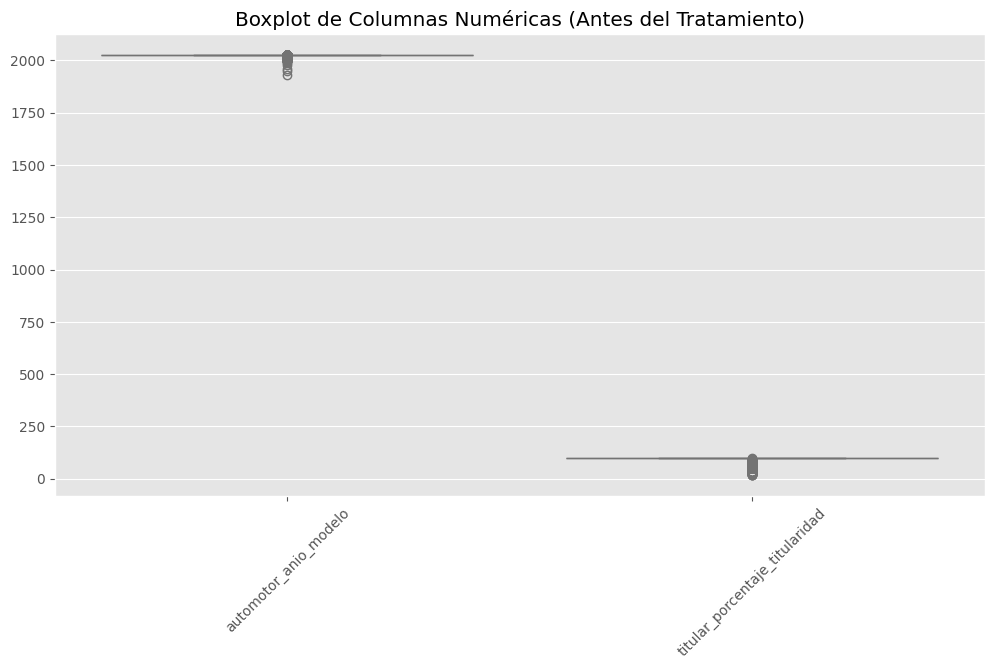

In [38]:
# Descarto registro_seccional_codigo porque es código (prevenir valores atipicos)

cols_a_analizar = [col for col in cols_numericas if col != 'registro_seccional_codigo']

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    print(f"Outliers detectados en '{columna}': {outliers.shape[0]}")
    return outliers

# Detecto outliers para cada columna relevante
for col in cols_a_analizar:
    detectar_outliers_iqr(df4, col)

# Columnas numéricas relevantes (sin registro_seccional_codigo)
columnas_numericas = [col for col in df4.select_dtypes(include=['int64', 'float64']).columns if col != 'registro_seccional_codigo']

# Visualización de outliers antes del tratamiento
plt.figure(figsize=(12, 6))
sns.boxplot(data=df4[columnas_numericas])
plt.title("Boxplot de Columnas Numéricas (Antes del Tratamiento)")
plt.xticks(rotation=45)
plt.show()

In [40]:
# Función para identificar outliers usando el método IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = columna[(columna < limite_inferior) | (columna > limite_superior)]
    return outliers

# Reutilizo columnas_numericas sin 'registro_seccional_codigo'
columnas_numericas = [col for col in df4.select_dtypes(include=['int64', 'float64']).columns if col != 'registro_seccional_codigo']

# Identifico outliers en cada columna numérica
for columna in columnas_numericas:
    outliers = detectar_outliers(df4[columna])
    print(f" Número de outliers según IQR en '{columna}': {len(outliers)}")
    print(f" Valores outliers en '{columna}': {outliers.values}\n")

 Número de outliers según IQR en 'automotor_anio_modelo': 1161
 Valores outliers en 'automotor_anio_modelo': [2024 2023 2024 ... 2024 2024 2024]

 Número de outliers según IQR en 'titular_porcentaje_titularidad': 3018
 Valores outliers en 'titular_porcentaje_titularidad': [50. 50. 50. ... 50. 50. 50.]



### Tratamiento de Outliers

<br>

Se aplicó el método del **Rango Intercuartílico (IQR)** para detectar valores atípicos en las variables numéricas del dataset, específicamente en:
- `automotor_anio_modelo`  
- `titular_porcentaje_titularidad`
<br>

#### Análisis de Resultados

<br>

- En `automotor_anio_modelo`, los valores considerados outliers corresponden principalmente a los años **2023 y 2024**, lo cual representa vehículos recientemente inscriptos. Si bien el IQR los clasifica como atípicos por estar alejados de la mayoría de los datos (autos más antiguos), **estos valores son válidos y relevantes para responder preguntas del análisis**, como las características de titulares de autos nuevos. Por lo tanto, se decidió **conservarlos**.

<br>

- En `titular_porcentaje_titularidad`, los outliers detectados son mayormente valores de **50.0%**, un valor frecuente que indica titularidad compartida entre dos personas. Aunque el IQR los marca como atípicos, **no son errores ni valores extremos inusuales**, por lo que también se optó por **mantenerlos en el dataset**.

<br>

#### Conclusión

<br>

Los valores identificados como outliers **no serán eliminados** ya que:
- Representan situaciones reales y frecuentes.
- Son información clave para responder las preguntas del proyecto.
- No implican errores de carga ni valores inverosímiles.

<br>


## Otras Transformaciones, Normalización, Fechas

In [41]:
# Creo df5 como copia de df4 para seguir la transformación sin perder versiones previas

df5 = df4.copy()

# Conversión de columnas de fecha

df5['tramite_fecha'] = pd.to_datetime(df5['tramite_fecha'], errors='coerce')
df5['fecha_inscripcion_inicial'] = pd.to_datetime(df5['fecha_inscripcion_inicial'], errors='coerce')

In [42]:
# Generación de nuevas columnas temporales

df5['tramite_anio'] = df5['tramite_fecha'].dt.year
df5['tramite_mes'] = df5['tramite_fecha'].dt.month
df5['tramite_dia_semana'] = df5['tramite_fecha'].dt.day_name()

In [43]:
# Creación de variable derivada: antigüedad del vehículo

df5['antiguedad_vehiculo'] = 2025 - df5['automotor_anio_modelo']

In [47]:
# Codificación de variables categóricas

# Creo df6 como versión transformada del df5
df6 = df5.copy()

# Variables categóricas a codificar para análisis y modelado
vars_categoricas = [
    'titular_genero',
    'titular_tipo_persona',
    'titular_domicilio_provincia',
    'automotor_marca_descripcion',
    'automotor_uso_descripcion'
]

# Codificación one-hot
df6 = pd.get_dummies(df6, columns=vars_categoricas, drop_first=True)

# Vista previa del DataFrame
df6.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_descripcion,automotor_modelo_descripcion,automotor_uso_codigo,titular_domicilio_localidad,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,tramite_anio,tramite_mes,tramite_dia_semana,antiguedad_vehiculo,titular_genero_Masculino,titular_genero_No aplica,titular_genero_No identificado,titular_tipo_persona_Jurídica,titular_domicilio_provincia_C.AUTONOMA DE BS.AS,titular_domicilio_provincia_CATAMARCA,titular_domicilio_provincia_CHACO,titular_domicilio_provincia_CHUBUT,titular_domicilio_provincia_CORDOBA,titular_domicilio_provincia_CORRIENTES,titular_domicilio_provincia_ENTRE RIOS,titular_domicilio_provincia_FORMOSA,titular_domicilio_provincia_JUJUY,titular_domicilio_provincia_LA PAMPA,titular_domicilio_provincia_LA RIOJA,titular_domicilio_provincia_MENDOZA,titular_domicilio_provincia_MISIONES,titular_domicilio_provincia_NEUQUEN,titular_domicilio_provincia_RIO NEGRO,titular_domicilio_provincia_SALTA,titular_domicilio_provincia_SAN JUAN,titular_domicilio_provincia_SAN LUIS,titular_domicilio_provincia_SANTA CRUZ,titular_domicilio_provincia_SANTA FE,titular_domicilio_provincia_SGO.DEL ESTERO,titular_domicilio_provincia_T.DEL FUEGO,titular_domicilio_provincia_TUCUMAN,automotor_marca_descripcion_AGRALE,automotor_marca_descripcion_AIELLO,automotor_marca_descripcion_ALFA ROMEO,automotor_marca_descripcion_APEZ,automotor_marca_descripcion_ARCTIC CAT,automotor_marca_descripcion_AST-PRA,automotor_marca_descripcion_ASTIVIA,automotor_marca_descripcion_ASTON MARTIN,automotor_marca_descripcion_AUDI,automotor_marca_descripcion_BAIC,automotor_marca_descripcion_BELGRANO MET.BEL.SRL,automotor_marca_descripcion_BERTOTTO BOGLIONE,automotor_marca_descripcion_BMW,automotor_marca_descripcion_BONANO,automotor_marca_descripcion_CAN-AM,automotor_marca_descripcion_CARRETONES DANIEL BRITO,automotor_marca_descripcion_CASAS RODANTES LEONES,automotor_marca_descripcion_CFMOTO,automotor_marca_descripcion_CHANGAN,automotor_marca_descripcion_CHERY,automotor_marca_descripcion_CHEVROLET,automotor_marca_descripcion_CITROEN,automotor_marca_descripcion_COMAR,automotor_marca_descripcion_CORADIR,automotor_marca_descripcion_CORMETAL,automotor_marca_descripcion_DAF,automotor_marca_descripcion_DANES,automotor_marca_descripcion_DAWI,automotor_marca_descripcion_DFM,automotor_marca_descripcion_DFSK,automotor_marca_descripcion_DI POLVERE,automotor_marca_descripcion_DIMATAN,automotor_marca_descripcion_DIMATRA,automotor_marca_descripcion_DM TRAILERS,automotor_marca_descripcion_DPA INOX METALURGICA,automotor_marca_descripcion_DS,automotor_marca_descripcion_EL FIERRO,automotor_marca_descripcion_EL GRILLO,automotor_marca_descripcion_EMIKEL,automotor_marca_descripcion_F.H.,automotor_marca_descripcion_FANGIO,automotor_marca_descripcion_FERBUS,automotor_marca_descripcion_FERRARI,automotor_marca_descripcion_FIAT,automotor_marca_descripcion_FORD,automotor_marca_descripcion_FOTON,automotor_marca_descripcion_FUR-TAN,automotor_marca_descripcion_FXV,automotor_marca_descripcion_GAMMA,automotor_marca_descripcion_GOLDHOFER,automotor_marca_descripcion_GOMATRO,automotor_marca_descripcion_GONELLA,automotor_marca_descripcion_GOTITAS RODANTES,automotor_marca_descripcion_GRASSANI,automotor_marca_descripcion_GREAT WALL,automotor_marca_descripcion_GROSS,automotor_marca_descripcion_H.C. MANCINI,automotor_marca_descripcion_HAVAL,automotor_marca_descripcion_HEIL,automotor_marca_descripcion_HELVETICA,automotor_marca_descripcion_HERMANN,automotor_marca_descripcion_HIDRO-GRUBERT,automotor_marca_descripcion_HINO,automotor_marca_descripcion_HIZA TRAILERS,automotor_marca_descripcion_HONDA,automotor_marca_descripcion_HYUNDAI,automotor_marca_descripcion_IDERO,automotor_marca_descripcion_INDECAR,automotor_marca_descripcion_INDU METAL TRAILERS,automotor_marca_descripcion_INDUSTRIAS AHT ALZUARTE,aut

# Análisis Exploratorio de Datos

## Análisis Univariado

In [51]:
# Variables numéricas para describir

num_vars = ['antiguedad_vehiculo', 'automotor_anio_modelo', 'titular_anio_nacimiento', 'titular_porcentaje_titularidad']

# Variables categóricas para describir

cat_vars = ['titular_genero_Masculino', 'titular_tipo_persona_Jurídica', 'automotor_uso_descripcion_Privado']

# 1. Estadísticas descriptivas para variables numéricas

print("Estadísticas descriptivas para variables numéricas:")
print(df5[num_vars].describe())



Estadísticas descriptivas para variables numéricas:
       antiguedad_vehiculo  automotor_anio_modelo  titular_porcentaje_titularidad
count         42000.000000           42000.000000                    42000.000000
mean              0.073810            2024.926190                       96.426739
std               1.050309               1.050309                       12.895333
min               0.000000            1928.000000                       17.000000
25%               0.000000            2025.000000                      100.000000
50%               0.000000            2025.000000                      100.000000
75%               0.000000            2025.000000                      100.000000
max              97.000000            2025.000000                      100.000000


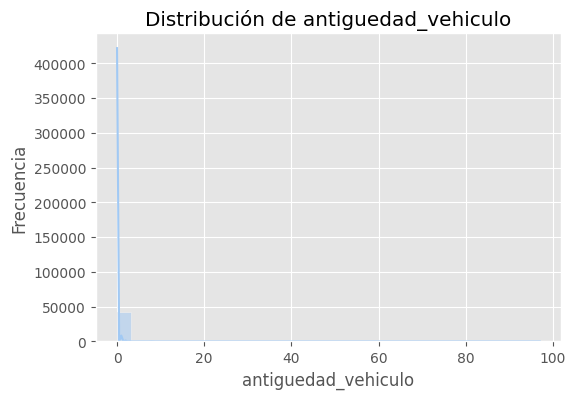

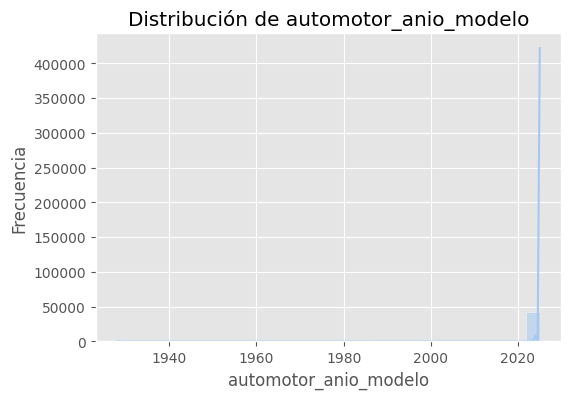

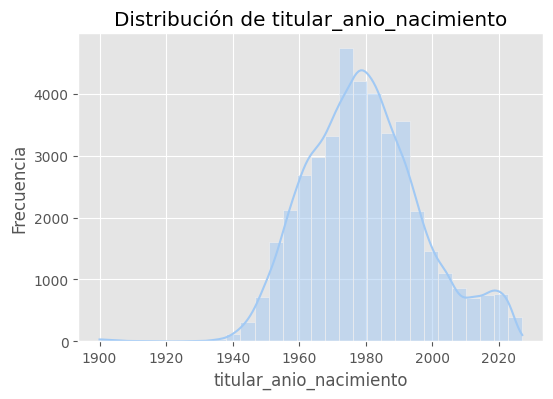

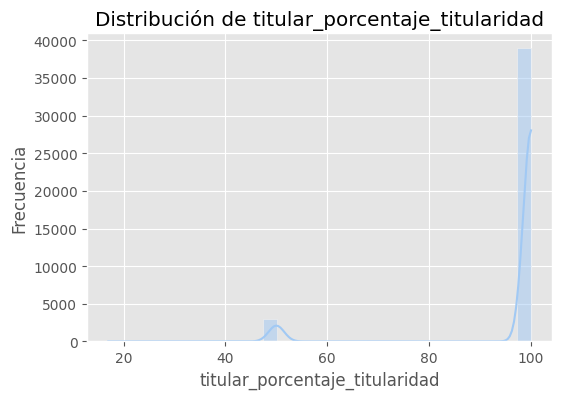

In [53]:
# 2. Distribución de variables numéricas - histogramas


for var in num_vars:
    # Forzar conversión numérica, invalidos pasan a NaN
    df5[var] = pd.to_numeric(df5[var], errors='coerce')

    plt.figure(figsize=(6,4))
    sns.histplot(df5[var].dropna(), bins=30, kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

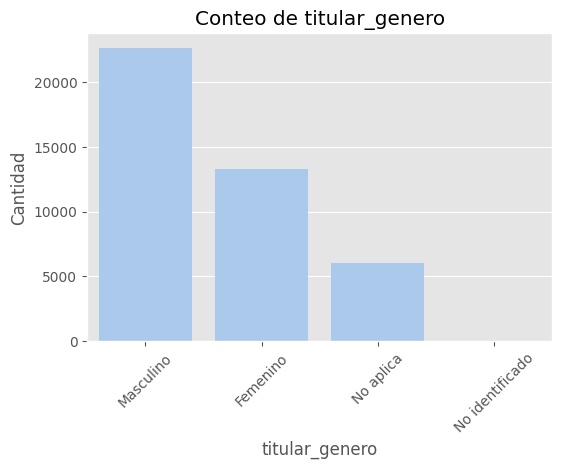

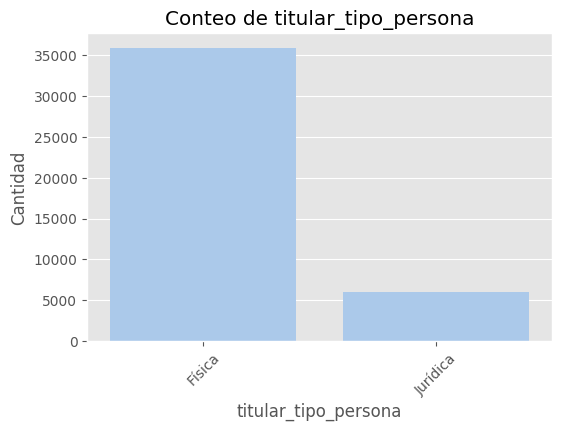

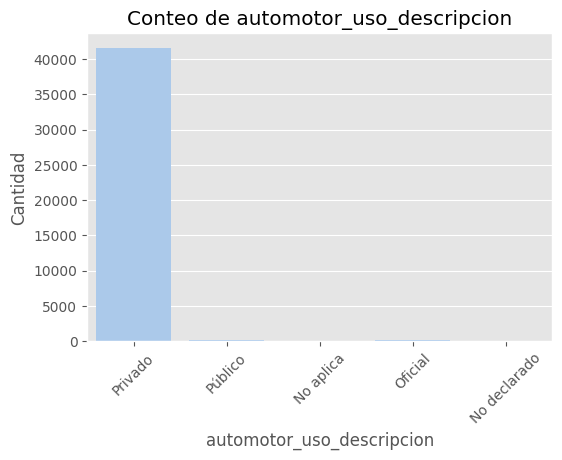

In [56]:
# 3. Conteo de variables categóricas - Grafico de barras

cat_vars_originales = ['titular_genero', 'titular_tipo_persona', 'automotor_uso_descripcion']

for var in cat_vars_originales:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, data=df5)
    plt.title(f'Conteo de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

In [59]:
# 4. Valores únicos para categóricas
for var in cat_vars_originales:
    print(f"Valores únicos en {var}:")
    print(df5[var].unique())
    print("\n")

Valores únicos en titular_genero:
['Masculino' 'Femenino' 'No aplica' 'No identificado']


Valores únicos en titular_tipo_persona:
['Física' 'Jurídica']


Valores únicos en automotor_uso_descripcion:
['Privado' 'Público' 'No aplica' 'Oficial' 'No declarado']




## Análisis Bivariado

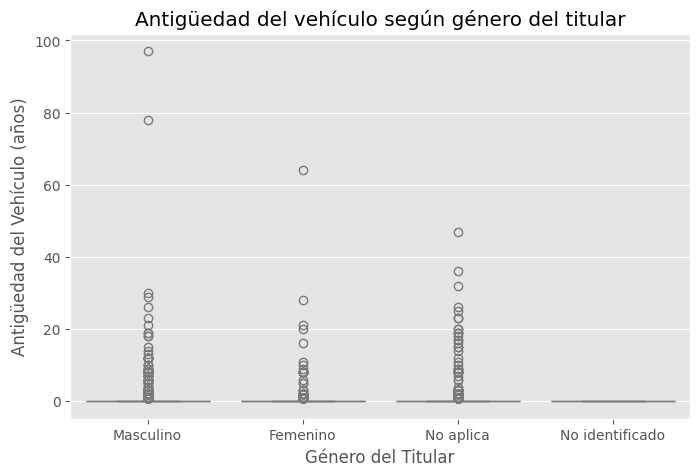

In [67]:
# Variables numéricas y categóricas df5

num_vars = ['antiguedad_vehiculo', 'automotor_anio_modelo']
cat_vars = ['titular_genero', 'titular_tipo_persona', 'automotor_uso_descripcion', 'titular_domicilio_provincia']

# Antigüedad del vehículo según género del titular

plt.figure(figsize=(8,5))
sns.boxplot(x='titular_genero', y='antiguedad_vehiculo', data=df5)
plt.title('Antigüedad del vehículo según género del titular')
plt.xlabel('Género del Titular')
plt.ylabel('Antigüedad del Vehículo (años)')
plt.show()



Tabla de contingencia: Uso del vehículo por tipo de persona
automotor_uso_descripcion  No aplica  No declarado  Oficial  Privado  Público
titular_tipo_persona                                                         
Física                             3             0       13    35868       73
Jurídica                           1             1      183     5729      129


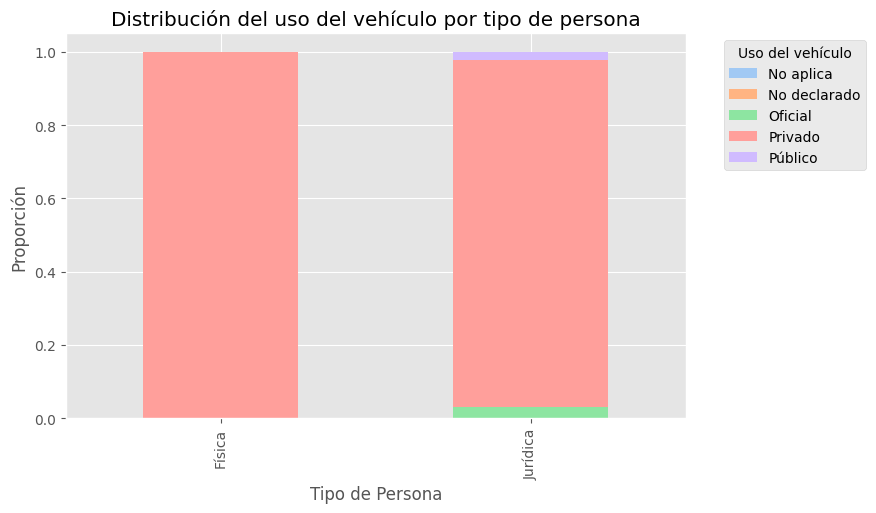

In [61]:
# Uso del vehículo según tipo de persona (tabla de contingencia y gráfico de barras apiladas)

tabla_uso_tipo = pd.crosstab(df5['titular_tipo_persona'], df5['automotor_uso_descripcion'])
print("Tabla de contingencia: Uso del vehículo por tipo de persona")
print(tabla_uso_tipo)

tabla_uso_tipo_norm = tabla_uso_tipo.div(tabla_uso_tipo.sum(1), axis=0)
tabla_uso_tipo_norm.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Distribución del uso del vehículo por tipo de persona')
plt.ylabel('Proporción')
plt.xlabel('Tipo de Persona')
plt.legend(title='Uso del vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

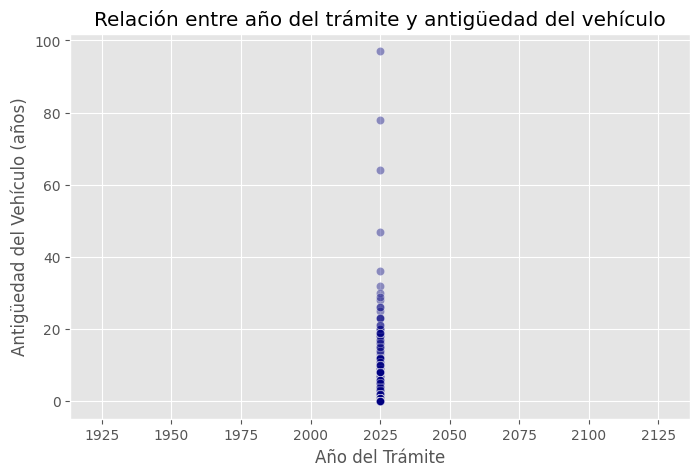

In [63]:
# Relación entre año del trámite y antigüedad del vehículo

plt.figure(figsize=(8,5))
sns.scatterplot(x='tramite_anio', y='antiguedad_vehiculo', data=df5, color='navy', alpha=0.4)
plt.title('Relación entre año del trámite y antigüedad del vehículo')
plt.xlabel('Año del Trámite')
plt.ylabel('Antigüedad del Vehículo (años)')
plt.show()

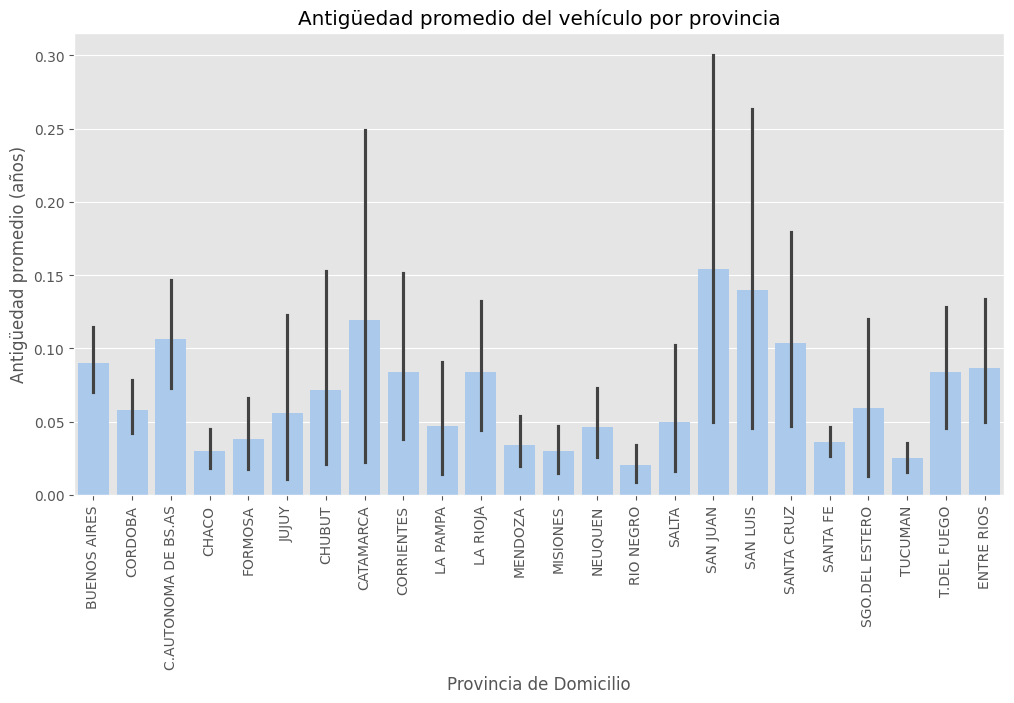

In [71]:
# Antigüedad promedio del vehículo por provincia de domicilio del titular

plt.figure(figsize=(12,6))
sns.barplot(x='titular_domicilio_provincia', y='antiguedad_vehiculo', data=df5)
plt.xticks(rotation=90)
plt.title('Antigüedad promedio del vehículo por provincia')
plt.xlabel('Provincia de Domicilio')
plt.ylabel('Antigüedad promedio (años)')
plt.show()

## Análisis Multivariado

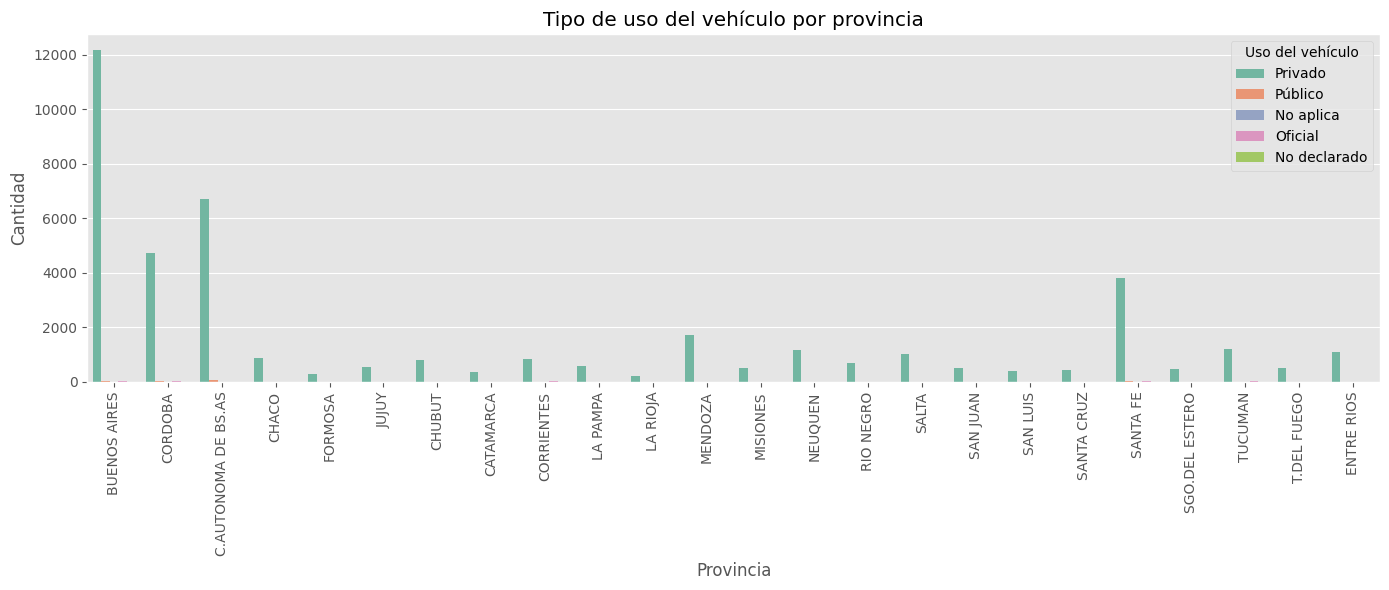

In [85]:
# Relación entre tipo de persona, uso del vehículo y provincia

plt.figure(figsize=(14,6))
sns.countplot(
    x='titular_domicilio_provincia',
    hue='automotor_uso_descripcion',
    data=df5[df5['titular_tipo_persona'].notna()],
    palette='Set2'
)
plt.xticks(rotation=90)
plt.title('Tipo de uso del vehículo por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Uso del vehículo')
plt.tight_layout()
plt.show()

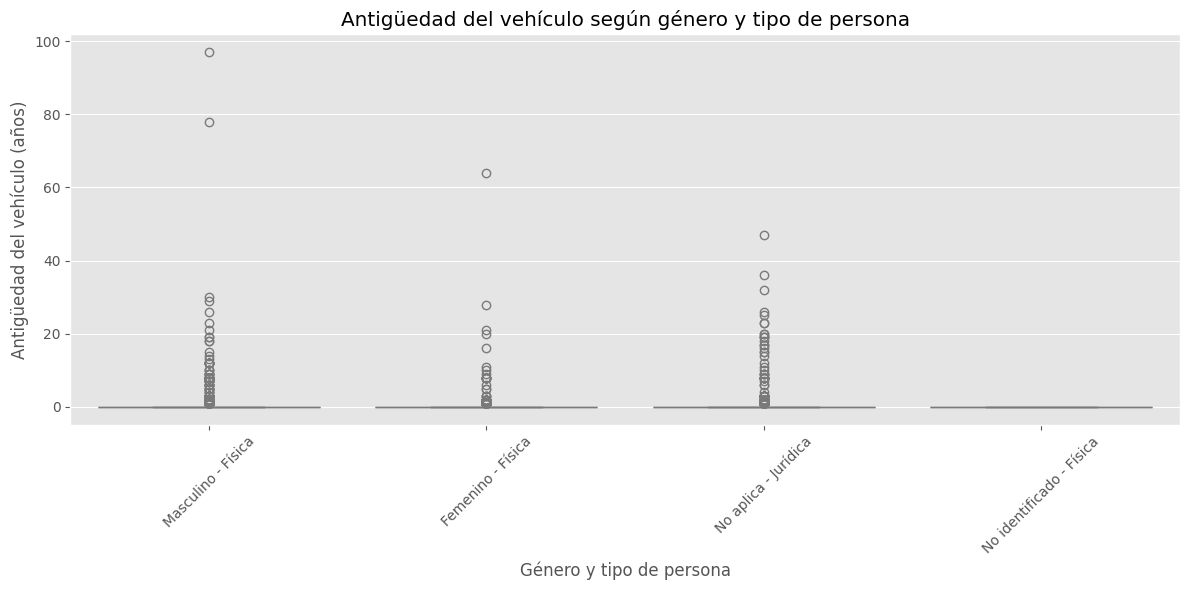

In [97]:
# Boxplot de antigüedad del vehículo según género y tipo de persona

# Agrego columna combinada
df5['genero_tipo'] = df5['titular_genero'] + ' - ' + df5['titular_tipo_persona']

plt.figure(figsize=(12,6))
sns.boxplot(
    x='genero_tipo',
    y='antiguedad_vehiculo',
    data=df5,
)
plt.title('Antigüedad del vehículo según género y tipo de persona')
plt.xlabel('Género y tipo de persona')
plt.ylabel('Antigüedad del vehículo (años)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

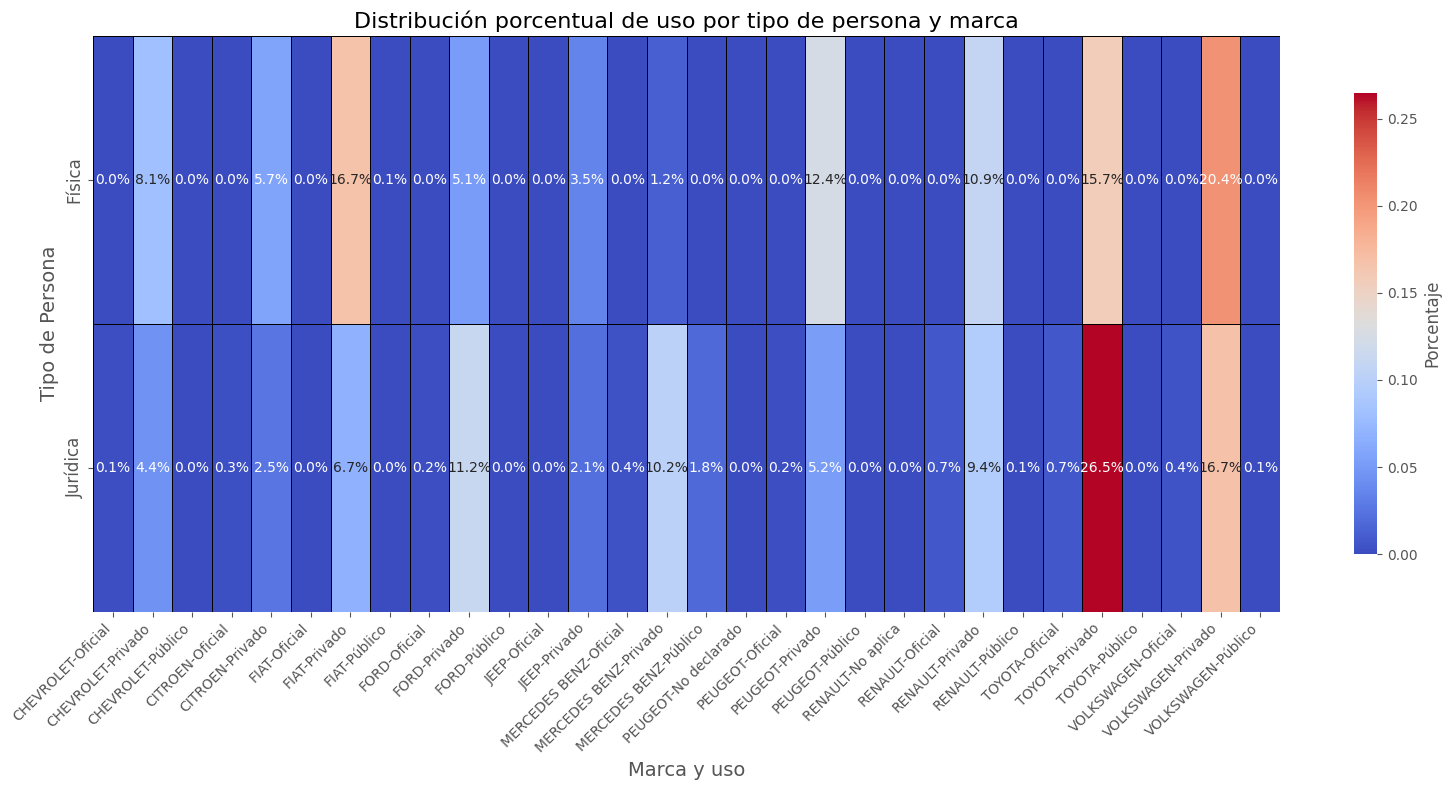

In [100]:
# Heatmap de frecuencia de tipo de uso por tipo de persona y marca

# Filtrar top 10 marcas
top_marcas = df5['automotor_marca_descripcion'].value_counts().nlargest(10).index
df_top = df5[df5['automotor_marca_descripcion'].isin(top_marcas)]

# Tabla cruzada
pivot_table = pd.crosstab(
    index=[df_top['titular_tipo_persona']],
    columns=[df_top['automotor_marca_descripcion'], df_top['automotor_uso_descripcion']]
)

# Normalizar (por tipo de persona)
pivot_table_pct = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(16,8))

sns.heatmap(
    pivot_table_pct,
    cmap='coolwarm',
    annot=True,
    fmt='.1%',
    linewidths=0.7,
    linecolor='black',
    cbar_kws={'shrink': 0.8, 'label': 'Porcentaje'}
)

plt.title('Distribución porcentual de uso por tipo de persona y marca', fontsize=16)
plt.xlabel('Marca y uso', fontsize=14)
plt.ylabel('Tipo de Persona', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

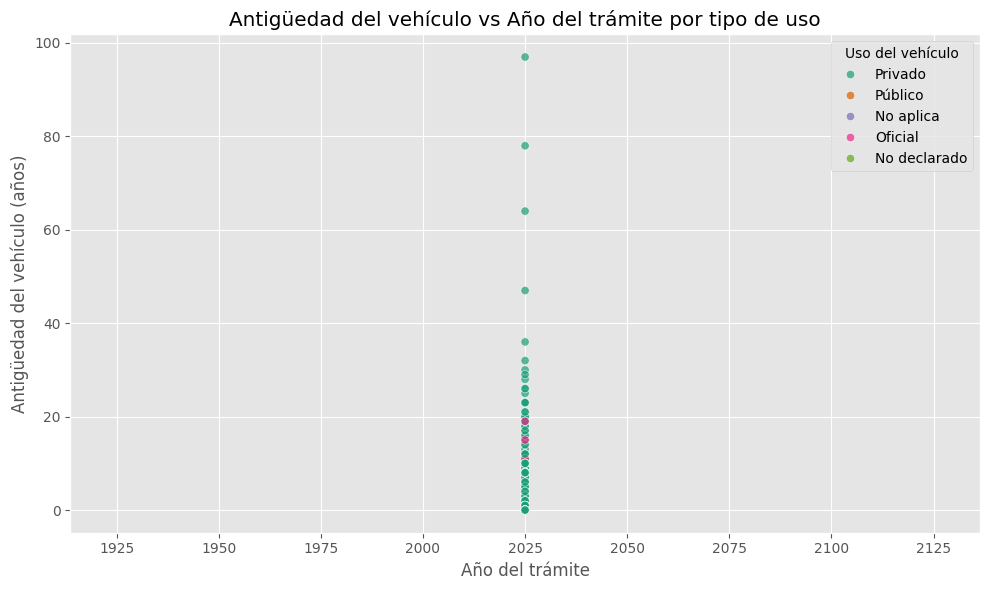

In [89]:
# Gráfico de dispersión 3 variables: año del trámite, antigüedad, y color por uso

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='tramite_anio',
    y='antiguedad_vehiculo',
    hue='automotor_uso_descripcion',
    data=df5,
    alpha=0.7,
    palette='Dark2'
)
plt.title('Antigüedad del vehículo vs Año del trámite por tipo de uso')
plt.xlabel('Año del trámite')
plt.ylabel('Antigüedad del vehículo (años)')
plt.legend(title='Uso del vehículo')
plt.tight_layout()
plt.show()

## Conclusiones de EDA

El análisis realizado muestra que la mayoría de los vehículos en la base de datos son relativamente nuevos, con una antigüedad promedio muy baja, lo que indica un parque automotor moderno en la zona estudiada. Los titulares son principalmente personas físicas con alta titularidad individual, y los vehículos se usan mayormente con fines privados.

Se detectaron variaciones significativas en la antigüedad de los vehículos según la provincia de residencia del titular, lo que sugiere diferencias regionales importantes para considerar en la planificación de la ubicación de una fábrica o centro de distribución. Además, la relación entre el tipo de persona, el género del titular, la marca y el uso del vehículo revela segmentos de mercado bien definidos.

Estos hallazgos aportan información clave para enfocar estrategias comerciales y logísticas, y para identificar zonas y perfiles de clientes con mayor potencial, facilitando así una toma de decisiones más informada y eficiente.

# Feature Selection (P.F)

## Seleccion de Variable Objetivo y Variables Independientes

# Procesamiento de Datos (P.F)



---

## Codificación de Variables Categóricas

# Modelos (P.F)

## Librerias Necesarias para Implementar los Modelos

## División de Datos en Conjuntos de Entrenamiento y Prueba

## Predicción con Conjunto de Prueba

## Evaluación del Rendimiento del Modelo

## Conclusión Sobre el Modelado y las Métricas

# Optimización de Modelos (P.F)

## Conclusión sobre la Optimización

# Conclusiones Finales (P.F)